In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bankdata.csv')

# Basic Overview 

In [3]:
df.describe()

,amount,balance
count,509.000000,509.000000
mean,8736.453006,115873.671493
std,27181.105774,136850.421744
min,1.000000,0.130000
25%,400.000000,35345.130000
50%,1120.000000,56645.670000
75%,7000.000000,121341.470000
max,360000.000000,473292.870000


In [4]:
df.columns

Index(['date', 'DrCr', 'amount', 'balance', 'mode', 'name'], dtype='object')

In [5]:
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
    else: numerical_columns.append(i) 

In [6]:
categorical_columns

['date', 'DrCr', 'mode', 'name']

# Univariate Analysis

##### 1. Categoriacal

In [7]:
df[categorical_columns].head(2)

,date,DrCr,mode,name
0,01-01-2022,Db,ATM,NaN
1,01-01-2022,Db,ATM,NaN


Number of days active (days transaction happens)

In [8]:
646 - len(df['date'].value_counts()) #total days of 2022 & 2023 - number of unique dates

333

Dates on which maximum transactions happened

In [9]:
df['date'].value_counts()[df['date'].value_counts().max() == df['date'].value_counts()]

21-02-2022    5
10-01-2022    5
12-01-2022    5
17-01-2023    5
31-01-2023    5
25-09-2023    5
Name: date, dtype: int64

3. Adding Day, Month and Year

In [10]:
df2 = df.copy()

In [11]:
day = []
month = []
year = []
for i in range(df2['date'].size):
    s = df2['date'].values[i].split('-')
    day.append(s[0])
    month.append(s[1])
    year.append(s[2])

In [12]:
df['Day'] = day
df['Month'] = month
df['Year'] = year

In [13]:
df.sample(4)

,date,DrCr,amount,balance,mode,name,Day,Month,Year
63,28-03-2022,Db,10000.0,234283.96,ATM,NaN,28,03,2022
109,13-06-2022,Db,300.0,146901.05,UPI,ADINATHM,13,06,2022
138,29-07-2022,Db,160000.0,11248.14,CHEQUE,NaN,29,07,2022
472,08-09-2023,Db,5000.0,42266.58,ATM,NaN,08,09,2023


4. In Which year more transaction are present?

In [14]:
df['Year'].value_counts()

2022    260
2023    249
Name: Year, dtype: int64

Now take 2nd Category i.e., DrCr

1. Percent of debit and credit

In [15]:
df['DrCr'].value_counts()/df['DrCr'].value_counts().sum() * 100

Db    73.280943
Cr    26.719057
Name: DrCr, dtype: float64

2. Plot Graph of above observings

<Axes: ylabel='DrCr'>

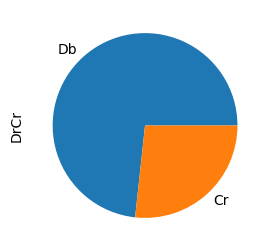

In [16]:
df['DrCr'].value_counts().plot(kind='pie',figsize=(3,3))

**Conclusion:** Out of 4 trnasactions 1 may be credit remaining 3(debits)

Now 3rd Category i.e., Mode

1. How Many ATM transactions are present?

In [17]:
(df['mode']=='ATM').sum()

49

2. Percentages of UPI transactions?
   **a.** Overall and
   **b.** UPI vs ATM 

In [18]:
df['mode'].value_counts()['UPI']/df['mode'].value_counts().sum() * 100

72.69155206286837

In [19]:
df['mode'].value_counts()['UPI'] / (df['mode'].value_counts()['UPI'] + df['mode'].value_counts()['ATM']) * 100

88.3054892601432

Now 4th Category i.e., Name

1. Name most frequent person ?

In [20]:
df['name'].value_counts().index[0]

'ABUTALAH'

2. plot graph of top 5 names.

<Axes: >

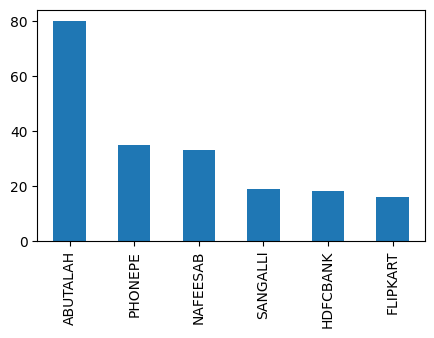

In [22]:
df['name'].value_counts()[:6].plot(kind='bar', figsize=(5,3))

#### Numerical colums

Analysis corresponding to Column-amount

1. Plot a line chart to get overview across time.

<Axes: >

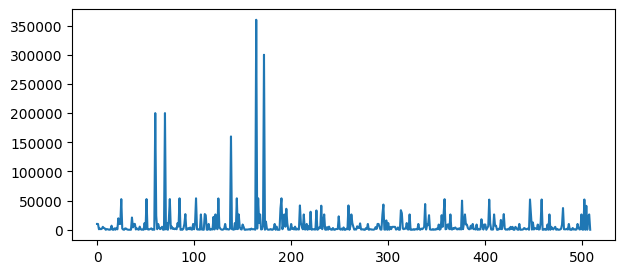

In [33]:
df['amount'].plot(figsize=(7,3))

2. Plot a histogram on it

<Axes: ylabel='Frequency'>

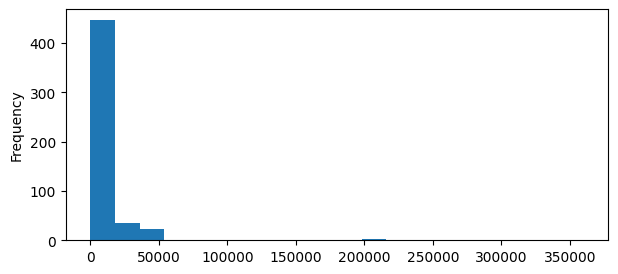

In [46]:
df['amount'].plot(kind='hist', figsize=(7,3), bins=20)

As we can see from line chart and histogram the outliers are present

There may be 5 outliers in data 

3. Remove extreme ouliers from copy df2 and check distribution

<Axes: >

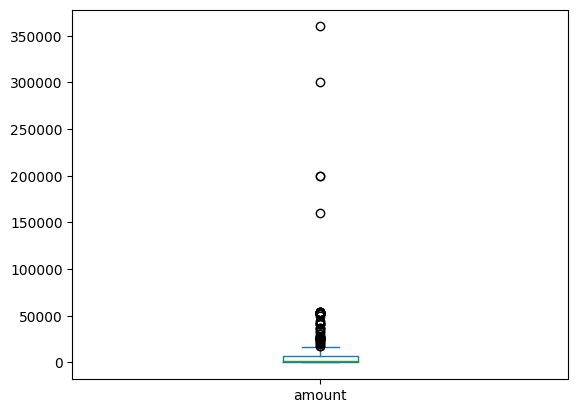

In [71]:
df['amount'].plot(kind='box')

There seem 4 extreme outliers greater than 100000

In [76]:
(df2['amount']<=100000).sum()

504

And there! are 5 may be overlaping points on box plot 

<Axes: ylabel='Frequency'>

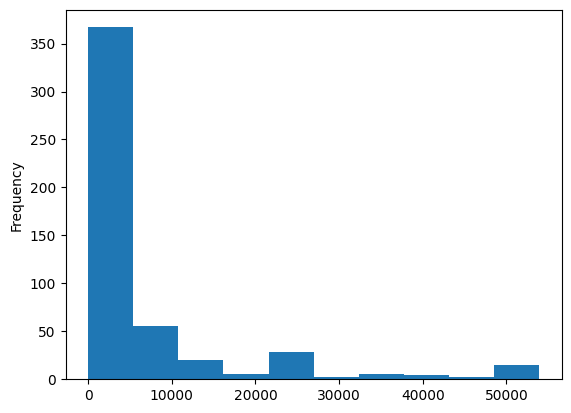

In [78]:
df2['amount'][df2['amount']<=100000].plot(kind='hist')

4. Remove 7 from above distribution percentile data and plot.

In [80]:
df3 = df2['amount'][df2['amount']<=100000].copy()

<Axes: ylabel='Frequency'>

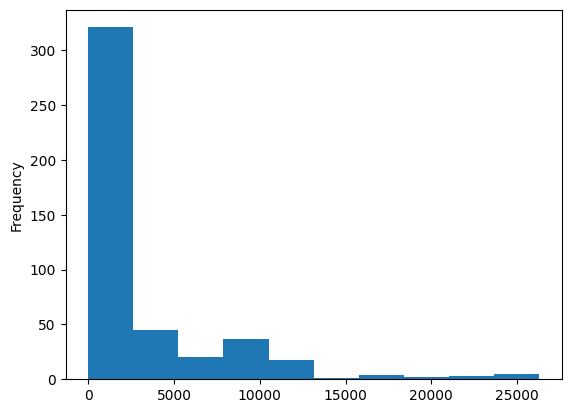

In [105]:
df3[df3<df3.quantile(0.93)].plot(kind='hist')

**Conclusion:** Its following Pareto distribution

Let's find what percent of data lies below 2500

In [130]:
df3[df3<df3.quantile(0.93)][df3[df3<df3.quantile(0.93)]<2500].size

319

In [134]:
df3[df3<df3.quantile(0.93)].size

456

In [137]:
round(319/456 * 100)

70

Its foloowing 70-30 rule

# Bivariate Analysis